## Dataset
* Reddit comments from [pushshift.io](https://files.pushshift.io/reddit/comments/)
* About 60k instances in the raw dataset from May & June, 2006

In [79]:
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import random
import json

In [2]:
DATA_DIR = pathlib.Path("./data")

may_reddit_comments_jsonl = DATA_DIR / "RC_2006-05.jsonl"
jun_reddit_comments_jsonl = DATA_DIR / "RC_2006-06.jsonl"
sept_reddit_comments_jsonl = DATA_DIR / "RC_2006-09.jsonl"

In [3]:
df = pd.read_json(
    '\n'.join([
        may_reddit_comments_jsonl.read_text(),
        jun_reddit_comments_jsonl.read_text()
    ]),
    lines=True
)

### Number of comments per author

In [4]:
df.author.value_counts()

[deleted]       15294
Fountainhead      417
mikepurvis        365
nostrademons      332
Taladar           321
                ...  
bangalore           1
aman                1
RobertRapier        1
jimbo345            1
chip_12             1
Name: author, Length: 4472, dtype: int64

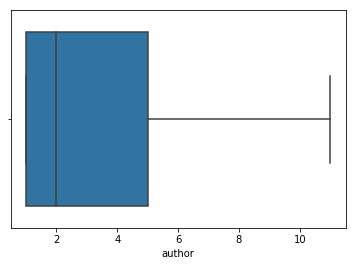

In [5]:
sns.boxplot(df.author.value_counts(), showfliers=False)

In [9]:
sum(df.author.value_counts() > 10)

691

In [58]:
sum(df.author.value_counts() > 100)

73

In [42]:
auth_counts = df.author.value_counts()
selected_authors = auth_counts[auth_counts >= 100]
selected_df = df[df.author.apply(lambda auth: auth in selected_authors.keys())]

In [63]:
dataset = {}

for auth, auth_df in selected_df.groupby("author"):
    dataset[auth] = auth_df.body.values.tolist()
    
del dataset["[deleted]"]  # Inconsistent

# Limit counts to 100 for each author
balanced_dataset = {}
for auth in dataset:
    balanced_dataset[auth] = random.sample(dataset[auth], 100)
    

In [78]:
print(f'#authors: {len(balanced_dataset)} \t #samples/author: {len(balanced_dataset["EliGottlieb"])}')

#authors: 73 	 #samples/author: 100


In [81]:
train_ds = {}
eval_ds = {}
test_ds = {}
for auth, comments in balanced_dataset.items():
    
    train_ds[auth] = comments[:60]
    eval_ds[auth] = comments[60:80]
    test_ds[auth] = comments[80:]
    
with open("anon_auth_dataset.json", "w+") as out:
    json.dump(obj=[train_ds, eval_ds, test_ds], fp=out)